In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.io.formats.format import get_precision
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA


# General

For analysing the data in the Elite Dataset, we extracted 1 millions games from the PGN files and created a CSV file with the features of the games.

In [19]:
# Load the data
df = pd.read_csv("CSV_Output/elite_chess_games_features-ALL.csv", low_memory=False)
# df = pd.read_csv('CSV_Output/elite_chess_games_features-1M_Games.csv')
df

,id,turns,white_id,black_id,white_rating,black_rating,time_control,opening_eco,opening_name,victory_status,winner
0,fXkApJtY,105,globito,alphafischer2019,2542,2357,180+2,B36,"Sicilian Defense: Accelerated Dragon, MarÃ³czy...",normal,1.0
1,8SwZugve,111,Lefjonjuv,lamomia,2454,2329,180+2,A13,English Opening: Neo-Catalan Declined,normal,1.0
2,a1s9Vkkx,109,Estudio_de_aperturas,TokChess,2352,2469,180+2,B41,"Sicilian Defense: Kan Variation, MarÃ³czy Bind...",time forfeit,1.0
3,eLxf8axC,37,PJatoba,rasool78,2464,2283,180+2,A04,Zukertort Opening: Queenside Fianchetto Variation,time forfeit,1.0
4,A7khKLxN,110,theken,Eltitiritero7,2494,2564,180+0,B10,Caro-Kann Defense,time forfeit,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
6726636,NaN,43,Matetricks,geochess,2497,2241,180+0,B92,"Sicilian Defense: Najdorf Variation, Opocensky...",normal,1.0
6726637,NaN,88,geochess,Matetricks,2236,2503,180+0,A08,King's Indian Attack,normal,-1.0
6726638,NaN,45,Matetricks,geochess,2509,2232,180+0,B84,"Sicilian Defense: Scheveningen Variation, Clas...",normal,1.0
6726639,NaN,78,geochess,Matetricks,2228,2515,180+0,A08,King's Indian Attack,normal,-1.0


In [20]:
print("(rows, columns) : ")
print(df.shape)

(rows, columns) : 
(6726641, 11)


As we can see the dataset is do not contain null values in any of the columns.

In [21]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6726641 entries, 0 to 6726640
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              object 
 1   turns           int64  
 2   white_id        object 
 3   black_id        object 
 4   white_rating    int64  
 5   black_rating    int64  
 6   time_control    object 
 7   opening_eco     object 
 8   opening_name    object 
 9   victory_status  object 
 10  winner          float64
dtypes: float64(1), int64(3), object(7)
memory usage: 564.5+ MB
None


# Data analysis

## Feature analysis

Feature list :

In [22]:
features = df.columns
if 'index' in features:
    features.remove('index')
print("Features list :")
for f in features:
    print(" - ", f)

Features list :
 -  id
 -  turns
 -  white_id
 -  black_id
 -  white_rating
 -  black_rating
 -  time_control
 -  opening_eco
 -  opening_name
 -  victory_status
 -  winner


As we can see, the dataset was well extracted as we do not have any id duplicates.

In [23]:
# Check if id is unique
print("Number of unique games : ", df['id'].nunique())

Number of unique games :  2907511


In [24]:
# function to get the correlation between two numerical features
def get_correlation(df, feature1, feature2):
    return df[feature1].corr(df[feature2])

def plot_distribution(df, feature,kde = False):
    plt.figure(figsize=(10, 6))
    if kde :
        sns.kdeplot(df[feature],fill=True)
    else :
        sns.countplot(data=df, x=feature, hue=feature, palette='coolwarm')
    plt.title(f"Distribution of {feature} vs Unrated Games")
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f"{feature} distribution")
    plt.show()

def plot_boxplot(df, feature1, feature2):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=feature1, y=feature2, hue=feature2, palette='pastel')
    plt.title(f"{feature1} vs {feature2}")
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.show()


- In this data set, we do not have any unrated games which is good for the analysis do not have to deal with the bias of the unrated games.
- When extracting the data, the author did not include the duration of the games. We will not be able to analyse the duration of the games.

### Turns
- Data type : int
- Number of turns in the game

In [25]:
feature = features[1]
df[feature].describe()

count    6.726641e+06
mean     8.250694e+01
std      3.445326e+01
min      0.000000e+00
25%      5.700000e+01
50%      7.800000e+01
75%      1.050000e+02
max      6.010000e+02
Name: turns, dtype: float64

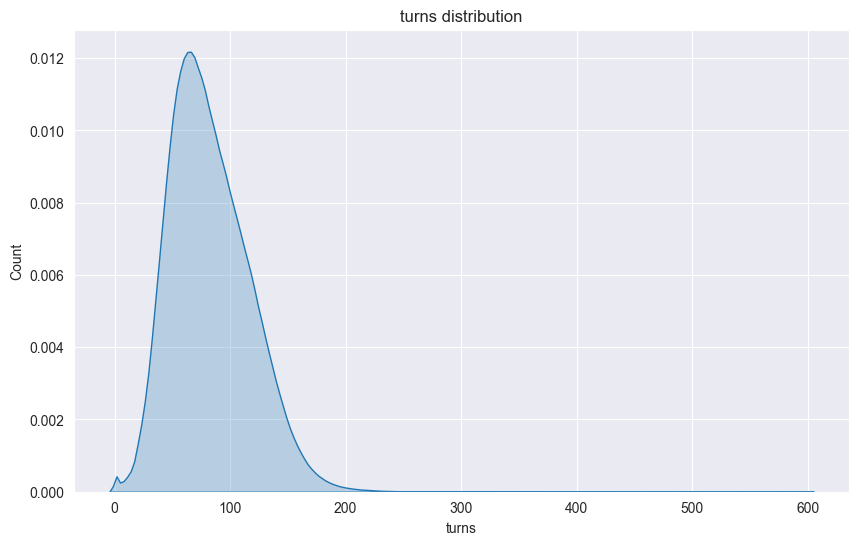

In [26]:
plot_distribution(df, feature, kde=True)

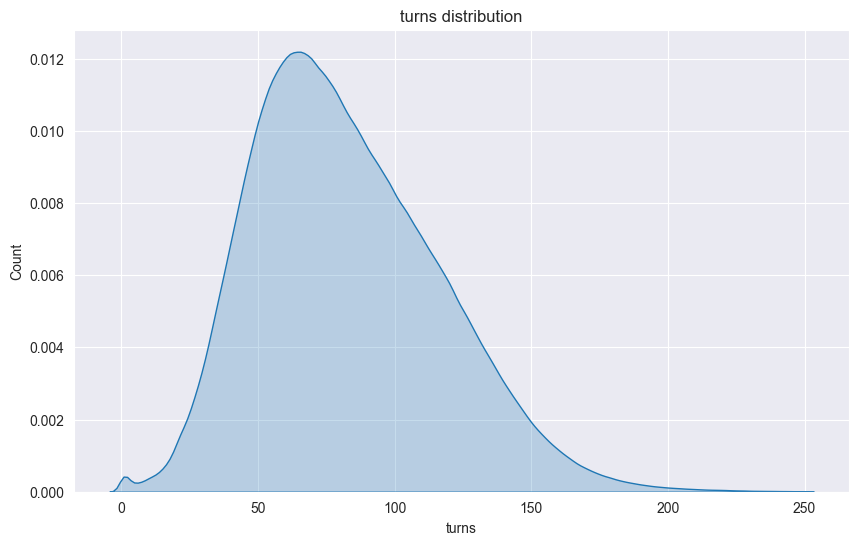

In [27]:
# plot ditribution of the game duration for duration < 250 minutes to have a better view
def remove_outliers(df, feature, threshold):
    return df[df[feature] < threshold]
plot_distribution(remove_outliers(df, feature, 250), feature, kde=True)

We can see that the correlation with the winner is very close to 0. We can say that the number of turns does not have a big impact on the winner.

In [28]:
get_correlation(df, feature, 'winner')

np.float64(-0.03361562445828417)

### Rating
- Data type : int
- Rating of the player
The data set contains only games of player with a very high rating. The rating of the players is between 2200 and 3200.

In [29]:
feature = 'white_rating'
df[feature].describe()

count    6.726641e+06
mean     2.442638e+03
std      1.045018e+02
min      2.200000e+03
25%      2.386000e+03
50%      2.436000e+03
75%      2.500000e+03
max      3.497000e+03
Name: white_rating, dtype: float64

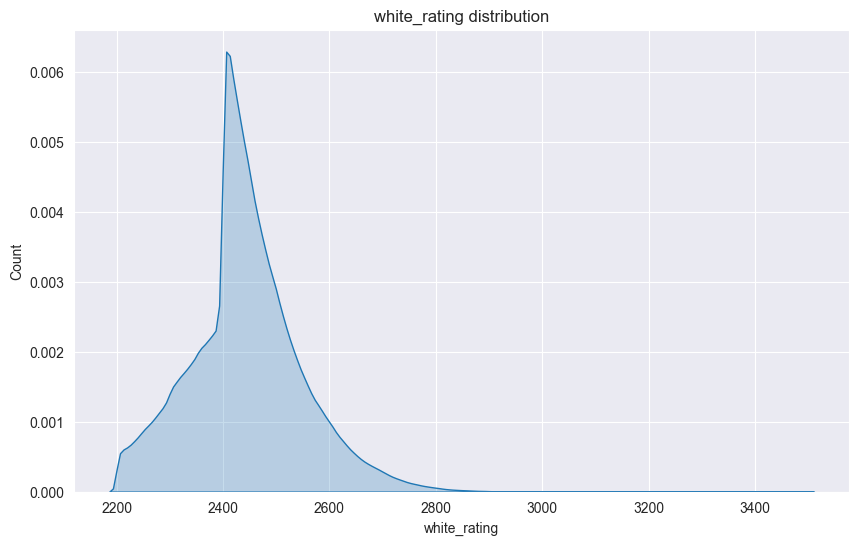

In [30]:
plot_distribution(df, feature, kde=True)

In [31]:
feature = 'black_rating'
df[feature].describe()

count    6.726641e+06
mean     2.442910e+03
std      1.045047e+02
min      2.200000e+03
25%      2.386000e+03
50%      2.436000e+03
75%      2.500000e+03
max      3.491000e+03
Name: black_rating, dtype: float64

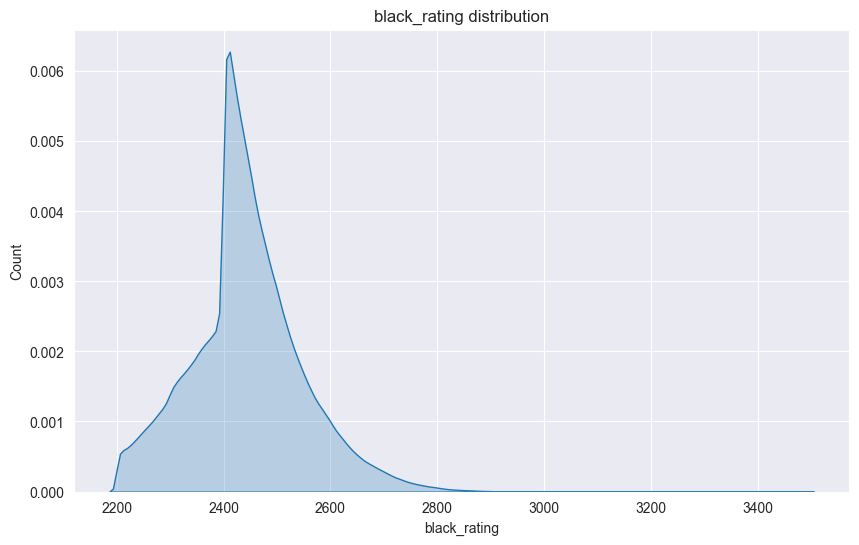

In [32]:
plot_distribution(df, feature, kde=True)

Let us add the difference between the ratings of the players to the dataset. This feature can be useful for the analysis. A positive value means that the white player has a higher rating than the black player.

In [33]:
df['rating_diff'] = df['white_rating'] - df['black_rating']
df['rating_diff'].describe()

count    6.726641e+06
mean    -2.718372e-01
std      1.336443e+02
min     -1.057000e+03
25%     -9.200000e+01
50%      0.000000e+00
75%      9.100000e+01
max      1.167000e+03
Name: rating_diff, dtype: float64

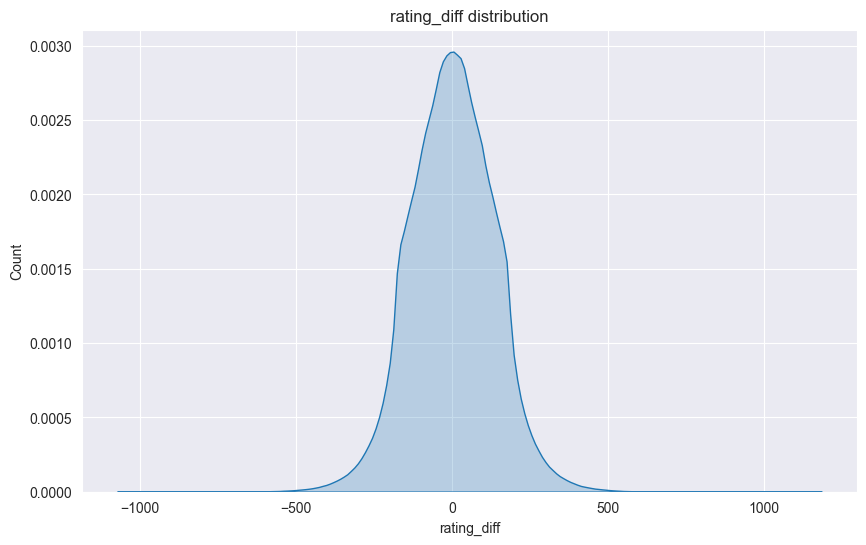

In [34]:
plot_distribution(df, 'rating_diff', kde=True)

In [35]:
get_correlation(df, 'rating_diff', 'winner')

np.float64(0.31615253091540624)

We can see that the correlation between the rating difference and the winner is not very high. We can try with removing the draws to see if the correlation is higher.

In [36]:
df_without_draws = df[df['winner'] != 0]
print(df_without_draws.shape)
print("Correlation : " ,get_correlation(df_without_draws, 'rating_diff', 'winner'))


(6120466, 12)
Correlation :  0.3289498128899549


### Time control
- Data type : string
- Time control of the game
See the other data analysis or the blog readme to see what the time control means.
> Note that in this dataset, the first value of the time control is in seconds.

In [37]:
feature = 'time_control'
df[feature].describe()

count     6726641
unique        355
top         180+0
freq      5494015
Name: time_control, dtype: object

In [38]:
df[feature].value_counts()

time_control
180+0      5494015
180+2       740688
300+0       285838
600+0        64043
180+1        46432
            ...   
2700+10          1
45+11            1
30+8             1
240+20           1
0+16             1
Name: count, Length: 355, dtype: int64

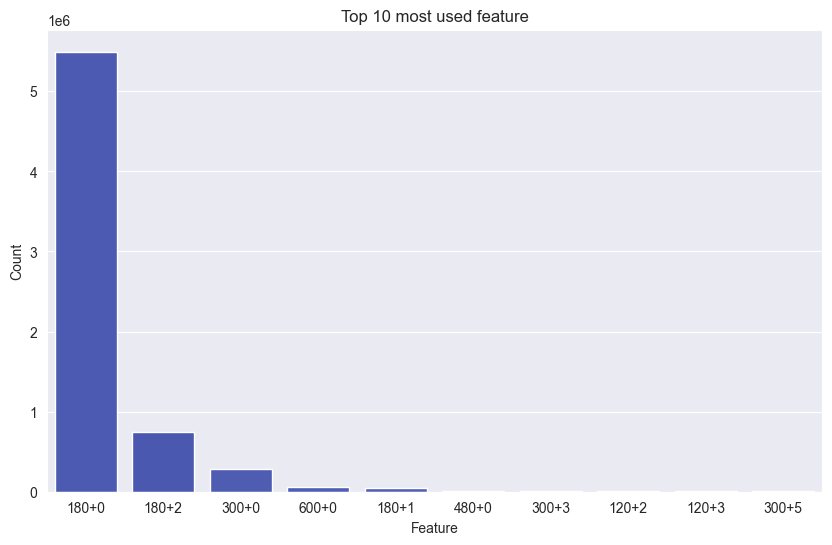

In [39]:
# plot the top 10 most used increment codes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=feature, hue=feature, order=df[feature].value_counts().iloc[:10].index, palette='coolwarm')
plt.title("Top 10 most used feature")
plt.xlabel('Feature')
plt.ylabel('Count')
plt.show()

In [40]:
# Let's extract the two
df[feature] = df[feature].astype(str)
df['time_per_player'] = df[feature].apply(lambda x: int(x.split('+')[0])/60)
df['increment'] = df[feature].apply(lambda x: int(x.split('+')[1]))
df

,id,turns,white_id,black_id,white_rating,black_rating,time_control,opening_eco,opening_name,victory_status,winner,rating_diff,time_per_player,increment
0,fXkApJtY,105,globito,alphafischer2019,2542,2357,180+2,B36,"Sicilian Defense: Accelerated Dragon, MarÃ³czy...",normal,1.0,185,3.0,2
1,8SwZugve,111,Lefjonjuv,lamomia,2454,2329,180+2,A13,English Opening: Neo-Catalan Declined,normal,1.0,125,3.0,2
2,a1s9Vkkx,109,Estudio_de_aperturas,TokChess,2352,2469,180+2,B41,"Sicilian Defense: Kan Variation, MarÃ³czy Bind...",time forfeit,1.0,-117,3.0,2
3,eLxf8axC,37,PJatoba,rasool78,2464,2283,180+2,A04,Zukertort Opening: Queenside Fianchetto Variation,time forfeit,1.0,181,3.0,2
4,A7khKLxN,110,theken,Eltitiritero7,2494,2564,180+0,B10,Caro-Kann Defense,time forfeit,-1.0,-70,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6726636,NaN,43,Matetricks,geochess,2497,2241,180+0,B92,"Sicilian Defense: Najdorf Variation, Opocensky...",normal,1.0,256,3.0,0
6726637,NaN,88,geochess,Matetricks,2236,2503,180+0,A08,King's Indian Attack,normal,-1.0,-267,3.0,0
6726638,NaN,45,Matetricks,geochess,2509,2232,180+0,B84,"Sicilian Defense: Scheveningen Variation, Clas...",normal,1.0,277,3.0,0
6726639,NaN,78,geochess,Matetricks,2228,2515,180+0,A08,King's Indian Attack,normal,-1.0,-287,3.0,0


In [41]:
feature = 'time_per_player'
df[feature].describe()

count    6.726641e+06
mean     3.199899e+00
std      1.192067e+00
min      0.000000e+00
25%      3.000000e+00
50%      3.000000e+00
75%      3.000000e+00
max      1.800000e+02
Name: time_per_player, dtype: float64

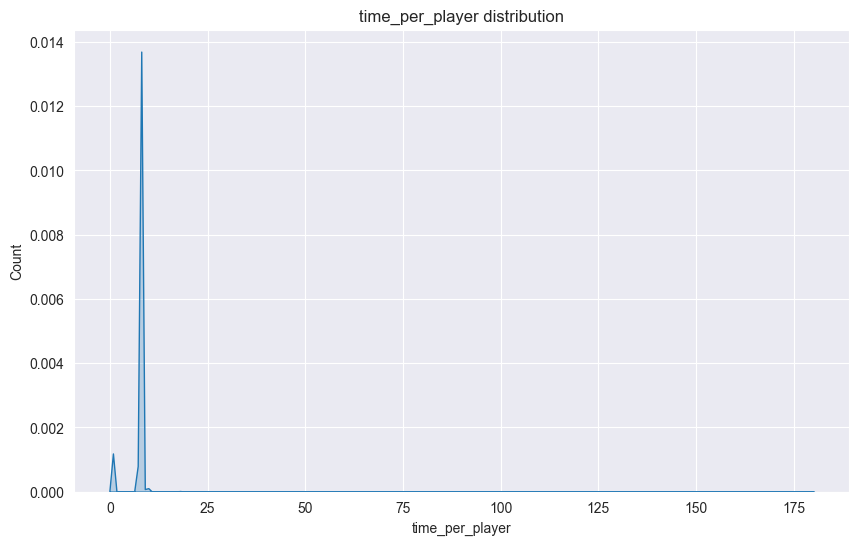

In [42]:
plot_distribution(df, feature, kde=True)

### Openings
- Data type : string
- Opening ECO code
The dat

In [43]:
feature = 'opening_eco'
df[feature].describe()

count     6726641
unique        501
top           A45
freq       214379
Name: opening_eco, dtype: object

In [44]:
df[feature].value_counts()

opening_eco
A45    214379
A04    191366
A00    180465
A40    164279
B06    150802
        ...  
D64        38
E58        14
D99        13
D54         6
D65         1
Name: count, Length: 501, dtype: int64

It is a good idea to transform the ECO code to numerical values. We can use the **LabelEncoder** or the **OneHotEncoder** from sklearn. As the ECO codes are not ordinal, we will use the **OneHotEncoder** combine with PCA to reduce the dimensionality.

In [45]:
encoder = OneHotEncoder(sparse_output=True)
eco_encoded = encoder.fit_transform(df[[feature]])
eco_encoded

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6726641 stored elements and shape (6726641, 501)>

In [46]:
pca = PCA(n_components=10)

pca_result = pca.fit_transform(eco_encoded)

pca_df = pd.DataFrame(data = pca_result, columns = [f'pca_openings_{i}' for i in range(10)])
pca_df

,pca_openings_0,pca_openings_1,pca_openings_2,pca_openings_3,pca_openings_4,pca_openings_5,pca_openings_6,pca_openings_7,pca_openings_8,pca_openings_9
0,-0.017276,-0.014305,-0.019627,-0.018383,-0.019508,-0.015473,-0.008600,-0.002850,-0.015885,-0.014835
1,-0.021576,-0.018430,-0.025808,-0.024976,-0.027450,-0.022941,-0.013500,-0.004571,-0.025926,-0.025136
2,-0.017854,-0.014844,-0.020421,-0.019206,-0.020470,-0.016336,-0.009139,-0.003035,-0.016951,-0.015892
3,-0.180190,0.923533,0.226512,0.093025,0.062415,0.032444,0.013301,0.004021,0.020982,0.017266
4,-0.026713,-0.023714,-0.034110,-0.034552,-0.040047,-0.036586,-0.024117,-0.008573,-0.050680,-0.054235
...,...,...,...,...,...,...,...,...,...,...
6726636,-0.017407,-0.014427,-0.019806,-0.018568,-0.019724,-0.015665,-0.008720,-0.002891,-0.016121,-0.015068
6726637,-0.020228,-0.017109,-0.023802,-0.022788,-0.024752,-0.020316,-0.011714,-0.003935,-0.022174,-0.021196
6726638,-0.016955,-0.014007,-0.019190,-0.017933,-0.018986,-0.015008,-0.008313,-0.002751,-0.015321,-0.014279
6726639,-0.020228,-0.017109,-0.023802,-0.022788,-0.024752,-0.020316,-0.011714,-0.003935,-0.022174,-0.021196


In [47]:
df = pd.concat([df, pca_df], axis=1)
df

,id,turns,white_id,black_id,white_rating,black_rating,time_control,opening_eco,opening_name,victory_status,...,pca_openings_0,pca_openings_1,pca_openings_2,pca_openings_3,pca_openings_4,pca_openings_5,pca_openings_6,pca_openings_7,pca_openings_8,pca_openings_9
0,fXkApJtY,105,globito,alphafischer2019,2542,2357,180+2,B36,"Sicilian Defense: Accelerated Dragon, MarÃ³czy...",normal,...,-0.017276,-0.014305,-0.019627,-0.018383,-0.019508,-0.015473,-0.008600,-0.002850,-0.015885,-0.014835
1,8SwZugve,111,Lefjonjuv,lamomia,2454,2329,180+2,A13,English Opening: Neo-Catalan Declined,normal,...,-0.021576,-0.018430,-0.025808,-0.024976,-0.027450,-0.022941,-0.013500,-0.004571,-0.025926,-0.025136
2,a1s9Vkkx,109,Estudio_de_aperturas,TokChess,2352,2469,180+2,B41,"Sicilian Defense: Kan Variation, MarÃ³czy Bind...",time forfeit,...,-0.017854,-0.014844,-0.020421,-0.019206,-0.020470,-0.016336,-0.009139,-0.003035,-0.016951,-0.015892
3,eLxf8axC,37,PJatoba,rasool78,2464,2283,180+2,A04,Zukertort Opening: Queenside Fianchetto Variation,time forfeit,...,-0.180190,0.923533,0.226512,0.093025,0.062415,0.032444,0.013301,0.004021,0.020982,0.017266
4,A7khKLxN,110,theken,Eltitiritero7,2494,2564,180+0,B10,Caro-Kann Defense,time forfeit,...,-0.026713,-0.023714,-0.034110,-0.034552,-0.040047,-0.036586,-0.024117,-0.008573,-0.050680,-0.054235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6726636,NaN,43,Matetricks,geochess,2497,2241,180+0,B92,"Sicilian Defense: Najdorf Variation, Opocensky...",normal,...,-0.017407,-0.014427,-0.019806,-0.018568,-0.019724,-0.015665,-0.008720,-0.002891,-0.016121,-0.015068
6726637,NaN,88,geochess,Matetricks,2236,2503,180+0,A08,King's Indian Attack,normal,...,-0.020228,-0.017109,-0.023802,-0.022788,-0.024752,-0.020316,-0.011714,-0.003935,-0.022174,-0.021196
6726638,NaN,45,Matetricks,geochess,2509,2232,180+0,B84,"Sicilian Defense: Scheveningen Variation, Clas...",normal,...,-0.016955,-0.014007,-0.019190,-0.017933,-0.018986,-0.015008,-0.008313,-0.002751,-0.015321,-0.014279
6726639,NaN,78,geochess,Matetricks,2228,2515,180+0,A08,King's Indian Attack,normal,...,-0.020228,-0.017109,-0.023802,-0.022788,-0.024752,-0.020316,-0.011714,-0.003935,-0.022174,-0.021196


### Victory status
- Data type : string
- Victory status of the game (normal - checkmate -, time_forfeit, abandoned, rules infraction)

In [48]:
feature = 'victory_status'
df[feature].describe()

count     6726641
unique          4
top        normal
freq      5185063
Name: victory_status, dtype: object

In [49]:
df[feature].value_counts()

victory_status
normal              5185063
time forfeit        1535703
abandoned              5739
rules infraction        136
Name: count, dtype: int64

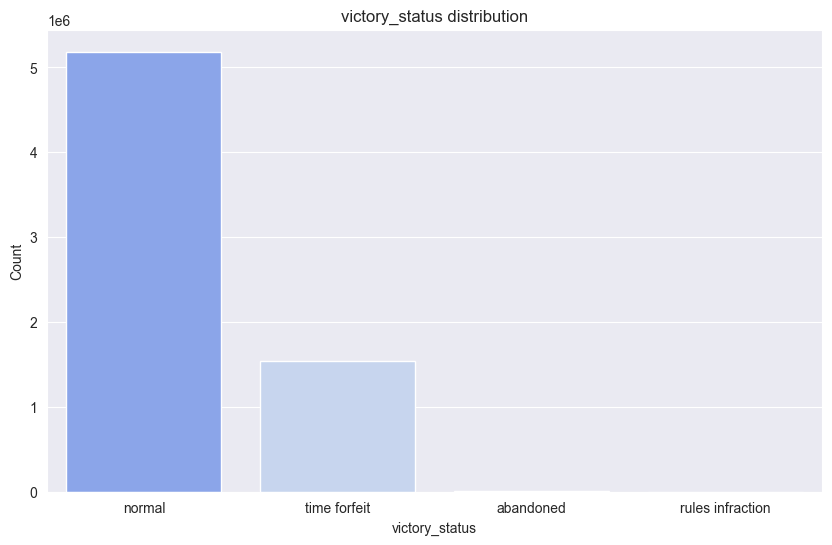

In [50]:
plot_distribution(df, feature)

As for openings, we can transform the victory status to numerical values. We will use the **OneHotEncoder** alone as the values are not ordinal and there are only 4 values.

In [51]:
encoder = OneHotEncoder(sparse_output=True)
victory_encoded = encoder.fit_transform(df[[feature]])
victory_encoded

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6726641 stored elements and shape (6726641, 4)>

In [52]:
# Get the original category names
category_names = encoder.categories_[0]

# Create the DataFrame with the original category names as column names
victory_df = pd.DataFrame(data=victory_encoded.toarray(), columns=category_names)
victory_df

,abandoned,normal,rules infraction,time forfeit
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
6726636,0.0,1.0,0.0,0.0
6726637,0.0,1.0,0.0,0.0
6726638,0.0,1.0,0.0,0.0
6726639,0.0,1.0,0.0,0.0


In [53]:
df = pd.concat([df, victory_df], axis=1)
df

,id,turns,white_id,black_id,white_rating,black_rating,time_control,opening_eco,opening_name,victory_status,...,pca_openings_4,pca_openings_5,pca_openings_6,pca_openings_7,pca_openings_8,pca_openings_9,abandoned,normal,rules infraction,time forfeit
0,fXkApJtY,105,globito,alphafischer2019,2542,2357,180+2,B36,"Sicilian Defense: Accelerated Dragon, MarÃ³czy...",normal,...,-0.019508,-0.015473,-0.008600,-0.002850,-0.015885,-0.014835,0.0,1.0,0.0,0.0
1,8SwZugve,111,Lefjonjuv,lamomia,2454,2329,180+2,A13,English Opening: Neo-Catalan Declined,normal,...,-0.027450,-0.022941,-0.013500,-0.004571,-0.025926,-0.025136,0.0,1.0,0.0,0.0
2,a1s9Vkkx,109,Estudio_de_aperturas,TokChess,2352,2469,180+2,B41,"Sicilian Defense: Kan Variation, MarÃ³czy Bind...",time forfeit,...,-0.020470,-0.016336,-0.009139,-0.003035,-0.016951,-0.015892,0.0,0.0,0.0,1.0
3,eLxf8axC,37,PJatoba,rasool78,2464,2283,180+2,A04,Zukertort Opening: Queenside Fianchetto Variation,time forfeit,...,0.062415,0.032444,0.013301,0.004021,0.020982,0.017266,0.0,0.0,0.0,1.0
4,A7khKLxN,110,theken,Eltitiritero7,2494,2564,180+0,B10,Caro-Kann Defense,time forfeit,...,-0.040047,-0.036586,-0.024117,-0.008573,-0.050680,-0.054235,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6726636,NaN,43,Matetricks,geochess,2497,2241,180+0,B92,"Sicilian Defense: Najdorf Variation, Opocensky...",normal,...,-0.019724,-0.015665,-0.008720,-0.002891,-0.016121,-0.015068,0.0,1.0,0.0,0.0
6726637,NaN,88,geochess,Matetricks,2236,2503,180+0,A08,King's Indian Attack,normal,...,-0.024752,-0.020316,-0.011714,-0.003935,-0.022174,-0.021196,0.0,1.0,0.0,0.0
6726638,NaN,45,Matetricks,geochess,2509,2232,180+0,B84,"Sicilian Defense: Scheveningen Variation, Clas...",normal,...,-0.018986,-0.015008,-0.008313,-0.002751,-0.015321,-0.014279,0.0,1.0,0.0,0.0
6726639,NaN,78,geochess,Matetricks,2228,2515,180+0,A08,King's Indian Attack,normal,...,-0.024752,-0.020316,-0.011714,-0.003935,-0.022174,-0.021196,0.0,1.0,0.0,0.0


## Winner

- Data type : int
- Winner of the game (0: draw, 1: white, -1: black)

In [54]:
feature = 'winner'
df[feature].describe()

count    6.724980e+06
mean     4.525025e-02
std      9.527931e-01
min     -1.000000e+00
25%     -1.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: winner, dtype: float64

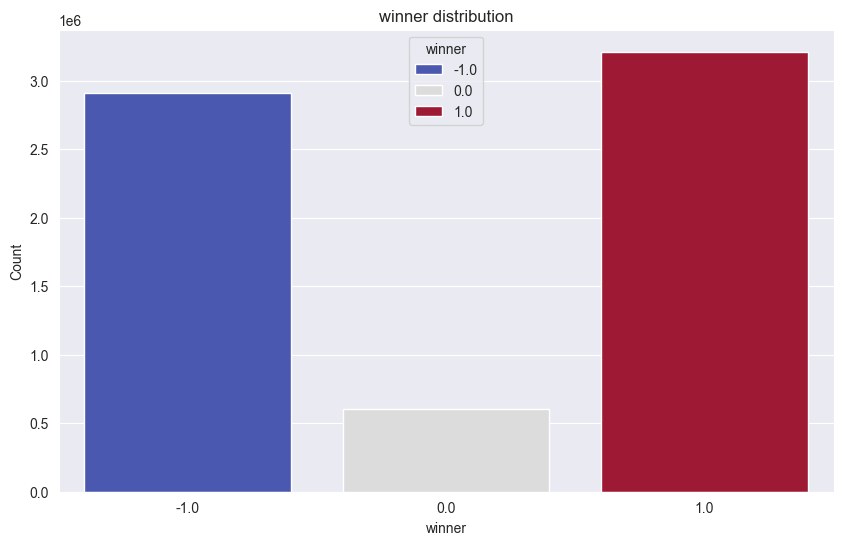

In [55]:
plot_distribution(df, feature)

## Correlation between features

Let's see the correlation between the features and the winner.

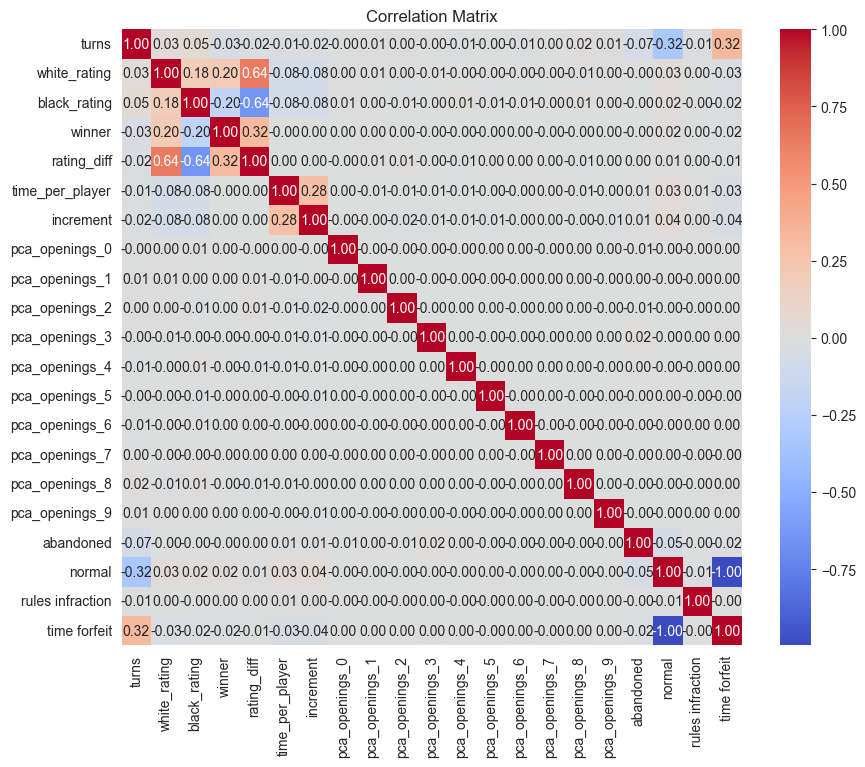

In [56]:
# Function to plot the correlation matrix
def plot_correlation_matrix(df):
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    # Calculate the correlation matrix
    correlation_matrix = numeric_df.corr()

    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Matrix")
    plt.show()

plot_correlation_matrix(df)

In [57]:
# save the data to a new csv file
df.to_csv('CSV_Output/elite_chess_games_features-ALL_cleaned.csv', index=False)